Task 3 : Number Recognition

In [3]:
!pip install tensorflow

In [4]:
import tensorflow as tf
print(tf.__version__)

C:\Users\Lenovo\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


2.14.0


In [5]:
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

Fetching MNIST dataset

In [6]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 8s 1us/step


In [7]:
X_test.shape

(10000, 28, 28)

In [8]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

Plotting the image

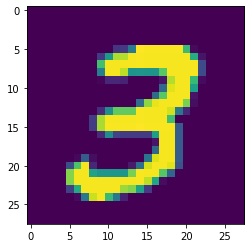

In [9]:
import matplotlib.pyplot as plt
plt.imshow(X_train[7])

In [10]:
X_train = X_train/255
X_test = X_test/255

In [11]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [12]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 104938 (409.91 KB)
Trainable params: 104938 (409.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])


Training the model

In [ ]:
history = model.fit(X_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 12s 7ms/step - loss: 0.2901 - accuracy: 0.9149 - val_loss: 0.1517 - val_accuracy: 0.9574
Epoch 2/25
1500/1500 [==============================] - 10s 7ms/step - loss: 0.1200 - accuracy: 0.9637 - val_loss: 0.1148 - val_accuracy: 0.9636
Epoch 3/25
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0832 - accuracy: 0.9748 - val_loss: 0.0997 - val_accuracy: 0.9700
Epoch 4/25
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0609 - accuracy: 0.9806 - val_loss: 0.0977 - val_accuracy: 0.9723
Epoch 5/25
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0479 - accuracy: 0.9851 - val_loss: 0.0910 - val_accuracy: 0.9745
Epoch 6/25
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0383 - accuracy: 0.9876 - val_loss: 0.0934 - val_accuracy: 0.9744
Epoch 7/25
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0291 - accuracy: 0.9901 - val_loss: 0.0931 - val_ac

In [ ]:
y_prob = model.predict(X_test)

In [ ]:
y_pred = y_prob.argmax(axis=1)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

Plotting the Training loss and Validation loss

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])


Plotting the accuracy

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [ ]:
plt.imshow(X_test[24])

In [ ]:
model.predict(X_test[1].reshape(1,28,28)).argmax(axis=1)